# Homework Week2
## 1.coding
#### 1.1 Finish 2D convolution/filtering
### 自定义中值滤波器
### 要求能够两种Padding方法，周边补零或者补相邻的数

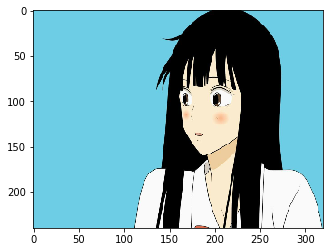

In [2]:
#读入即将处理的图像
#定义1个卷积核
#resize输入的图片方便显示与计算
#将输入图像的三通道分离，因为自定义的滤波器只支持单通道
#显示图像
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\vcprojects\images\test2.jpg')
img = cv2.resize(img, (320,240))
B, G, R = cv2.split(img)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img[:,:,[2,1,0]])

### 自定义的滤波函数
#### 输入：图像（单通道）:img ；滤波器:kernel ；填充方式：padding_way
##### 函数只接受单通道图像，滤波器需要自己定义，填充方式有两种，一种是边缘补零（padding_way= 0;默认），还有一种是填充边缘值(padding_way=anythingelse)

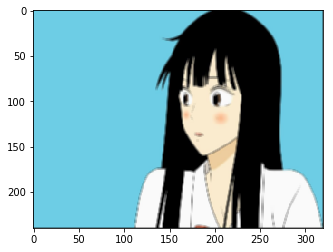

In [3]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]
                  ], np.float32)
kernel4 = np.array([[1, 1, 1, 1],
                   [1, 1, 1, 1],
                   [1, 1, 1, 1]
                  ], np.float32)
kernel5 = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                  ], np.float32)
def medianBlur(img, kernel, padding_way = 0):
    #得到kernel的高和宽
    m = len(kernel)
    n = len(kernel[0])
    #得到img的高和宽
    H = len(img)
    W = len(img[0])
    #得到需要补充的padding的大小，分为H和W两个方向
    padding_H = m // 2 #H方向的padding
    padding_W = n // 2 #W方向的padding
    #创建补充了padding的img
    import numpy as np
    padding_img = np.zeros((H + m // 2 * 2, W + n // 2 * 2))
    #如果padding_way为0，则填充方式是周围补上相应的零
    if padding_way == 0:
        padding_img[m//2:H + m//2, n//2:W + n//2] = img #得到了填充边缘为0的padding_img
        #遍历padding_img，对其进行卷积操作
        con_img = [] #定义一个用来存储输出图像的空列表
        for h in range(0,H):
            scon_img = [] #定义一个用来存储W方向上的滤波后的列表
            for w in range(0,W): 
                avg = padding_img[h:h+m,w:w+n] * kernel #将填充后的img与kernel进行卷积运算
                avg = np.mean(avg) #得到卷积之后的平均值
                scon_img.append(avg) #将avg添加到方向上的列表
            con_img.append(scon_img) #得到一条完整的单方向卷积列表
        con_img = np.array(con_img,dtype = np.uint8) #得到卷积之后的矩阵，将类型转为uint8
    else:
        #如果padding_way输入的是除0之外的的数，则周围填充的是边缘的数
        padding_img[m//2:H + m//2, n//2:W + n//2] = img #先获得填充边缘你为0的padding_img
        _top = np.array((m//2,W)) #创建顶部填充的数组
        _down = np.array((m//2,W))#创建底部填充数组
        _left = np.array((H,n//2))#左侧填充数组
        _right = np.array((H,n//2))#右侧填充数组
        #以下四行分别得到对应的边缘值
        _top = padding_img[m//2:m//2+1,:]
        _down = padding_img[H+m//2-1:H+m//2,:]
        _left = padding_img[:,n//2:n//2+1]
        _right = padding_img[:,W+n//2-1:W+n//2]
        #以下四行分别填充对应的边缘值
        padding_img[:m//2,:] = _top
        padding_img[H:,:]= _down
        padding_img[:,:n//2] = _left
        padding_img[:,W:] = _right
        
        #遍历padding_img，对其进行卷积操作
        con_img = []
        for h in range(0,H):
            scon_img = []
            for w in range(0,W):
                avg = padding_img[h:h+m,w:w+n] * kernel
                avg = np.mean(avg)
                scon_img.append(avg)
            con_img.append(scon_img)
        con_img = np.array(con_img,dtype = np.uint8)
    return con_img
            
    
B = medianBlur(B, kernel, 0)
G = medianBlur(G, kernel, 0)
R = medianBlur(R, kernel, 0)
mer = cv2.merge((B,G,R))
plt.imshow(mer[:,:,[2,1,0]])
#可以看到经过kernel大小为3x3的滤波器后，图像变得有点模糊

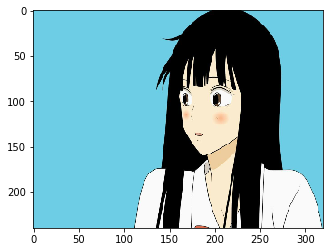

In [5]:
plt.imshow(img[:,:,[2,1,0]]) #原图，与上图比较用

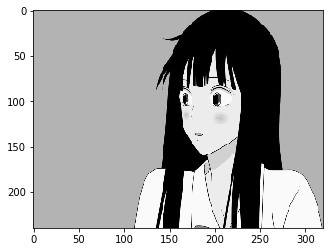

In [6]:
#试一下另外一个kernel，我们把填充方式改为边缘填充,把图像改为灰度图像
kernel = np.array([[1, 1, 1],
                   [1, 8, 1],
                   [1, 1, 1]
                  ], np.float32)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap= 'gray') #显示灰度图原图

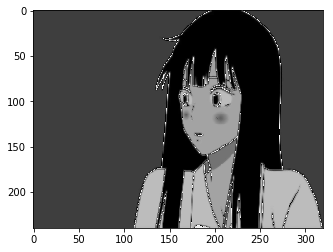

In [7]:
#经过自定义滤波器,进行一个锐化效果
res = medianBlur(img_gray, kernel,1)
plt.imshow(res,cmap= 'gray')

#### 1.2 Reading RANSAC
RANSAC（随机抽样一致）是一种迭代方法，用于从包含异常值的一组观察数据中估计数学模型的参数。假设一个简单的例子：在一组观测数据中找到一条合适的2维曲线，假设用最小二乘法，将无法找到，但是它可以解决最小二乘法无法解决的问题，因为最小二乘法会试着去拟合那些噪音点，从而导致无法生成合适的模型，RANSAC不能保证结果一定正确，需要小心参数选择。
RANSAC工作的步骤：

RANSAC输入：

        一组观测数据；一个可解释或者适用于观测数据的参数模型；一些可信参数
        
RANSAC通过反复选择数据中的随机子集来达成目标。被选中的子集被假设为局内点，进行如下验证：

① 有一个模型适应于假设的局内点，即所有的未知参数都能从假设的局内点得出。 

② 用①中得到的模型去测试所有的其他数据，如果某个点适用于该模型，认为它也是局内点。

③ 如果有足够多的原局外点被归类为假设的局内点，那么估计模型足够合理。

④ 然后，用所有假设的局内点去重新估计这个模型，因为刚才的局内点只是仅仅适应于该模型。

⑤ 最后，通过局内点与模型的错误率来评估模型。

对以上过程进行迭代，每次产生的模型要么因为局内点太少二舍弃，要么出现了比现有的模型更好的模型而取代。

伪代码实现：

       数据 —— 一组观察数据
       Model —— 解释观察数据点的模型
       n —— 估计模型参数所需的最小数据点数
       k —— 算法中的迭代次数
       t ——用于确定模型拟合的数据点的阈值
       d —— 断言模型非常合适数据所需的密切数据点数
       
       返回：bestFit —— 最适合数据的模型参数（如果没有找到好的模型，返回None
       ）
        
       iterations = 0
       bestFit = None
       bestErr = Max_Integer
       while iterations < k:
          maybeInliers = n randonmly selected values form data
          maybeModel = model parameters fitted to maybeInliers
          alsoInliers = {}
          for every point in data not in maybeInliers (
             if point fits maybeModel with en error smaller than t:
                 add point to alsoInliers
          if number of elements in alsoInliers is > d:
             # this implies that we may have found a good model
             # now test how good it is
             betterModel = model parameters fitted to all points in maybeInliers
             and alsoInliers
             thisErr = a measure of how well betterModel fits these points
             if thisErr < bestErr:
                bestFit = betterModel
                bestErr = thisErr
           iterations += 1
        return bestFit
                      

# 以下（csdn博客摘抄，供自己参考）为RANSAC支线模型实现

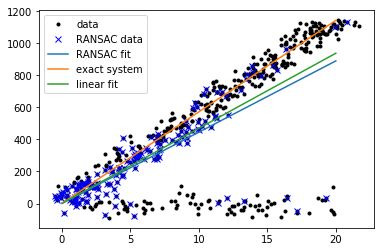

In [8]:
import numpy as np
import scipy as sp
import scipy.linalg as sl
def ransac(data, model, n, k, t, d, debug = False, return_all = False):
    iterations = 0
    bestfit = None
    besterr = np.inf #设置默认值
    best_inlier_idxs = None
    while iterations < k:
        maybe_idxs, test_idxs = random_partition(n, data.shape[0])
        maybe_inliers = data[maybe_idxs, :] #获取size(maybe_idxs)行数据(Xi,Yi)
        test_points = data[test_idxs] #若干行(Xi,Yi)数据点
        maybemodel = model.fit(maybe_inliers) #拟合模型
        test_err = model.get_error(test_points, maybemodel) #计算误差:平方和最小
        also_idxs = test_idxs[test_err < t]
        also_inliers = data[also_idxs,:]
        if debug:
            print ('test_err.min()',test_err.min())
            print ('test_err.max()',test_err.max())
            print ('numpy.mean(test_err)',numpy.mean(test_err))
            print ('iteration %d:len(alsoinliers) = %d' %(iterations, len(also_inliers)) )
        if len(also_inliers > d):
            betterdata = np.concatenate( (maybe_inliers, also_inliers) ) #样本连接
            bettermodel = model.fit(betterdata)
            better_errs = model.get_error(betterdata, bettermodel)
            thiserr = np.mean(better_errs) #平均误差作为新的误差
            if thiserr < besterr:
                bestfit = bettermodel
                besterr = thiserr
                best_inlier_idxs = np.concatenate( (maybe_idxs, also_idxs) ) #更新局内点,将新点加入
        iterations += 1
        if bestfit is None:
            raise ValueError("did't meet fit acceptance criteria")
        if return_all:
            return bestfit,{'inliers':best_inlier_idxs}
        else:
            return bestfit
def random_partition(n, n_data):
    """return n random rows of data and the other len(data) - n rows"""
    all_idxs = np.arange(n_data) #获取n_data下标索引
    np.random.shuffle(all_idxs) #打乱下标索引
    idxs1 = all_idxs[:n]
    idxs2 = all_idxs[n:]
    return idxs1, idxs2

 

class LinearLeastSquareModel:
    #最小二乘求线性解,用于RANSAC的输入模型    
    def __init__(self, input_columns, output_columns, debug = False):
        self.input_columns = input_columns
        self.output_columns = output_columns
        self.debug = debug
    def fit(self, data):
        A = np.vstack( [data[:,i] for i in self.input_columns] ).T #第一列Xi-->行Xi
        B = np.vstack( [data[:,i] for i in self.output_columns] ).T #第二列Yi-->行Yi
        x, resids, rank, s = sl.lstsq(A, B) #residues:残差和
        return x #返回最小平方和向量   

    def get_error(self, data, model):
        A = np.vstack( [data[:,i] for i in self.input_columns] ).T #第一列Xi-->行Xi
        B = np.vstack( [data[:,i] for i in self.output_columns] ).T #第二列Yi-->行Yi
        B_fit = sp.dot(A, model) #计算的y值,B_fit = model.k*A + model.b
        err_per_point = np.sum( (B - B_fit) ** 2, axis = 1 ) #sum squared error per row
        return err_per_point
def test():
    #生成理想数据
    n_samples = 500 #样本个数
    n_inputs = 1 #输入变量个数
    n_outputs = 1 #输出变量个数
    A_exact = 20 * np.random.random((n_samples, n_inputs))#随机生成0-20之间的500个数据:行向量
    perfect_fit = 60 * np.random.normal( size = (n_inputs, n_outputs) ) #随机线性度即随机生成一个斜率
    B_exact = sp.dot(A_exact, perfect_fit) # y = x * k

    #加入高斯噪声,最小二乘能很好的处理
    A_noisy = A_exact + np.random.normal( size = A_exact.shape ) #500 * 1行向量,代表Xi
    B_noisy = B_exact + np.random.normal( size = B_exact.shape ) #500 * 1行向量,代表Yi
    if 1:
        #添加"局外点"
        n_outliers = 100
        all_idxs = np.arange( A_noisy.shape[0] ) #获取索引0-499
        np.random.shuffle(all_idxs) #将all_idxs打乱
        outlier_idxs = all_idxs[:n_outliers] #100个0-500的随机局外点
        A_noisy[outlier_idxs] = 20 * np.random.random( (n_outliers, n_inputs) ) #加入噪声和局外点的Xi
        B_noisy[outlier_idxs] = 50 * np.random.normal( size = (n_outliers, n_outputs)) #加入噪声和局外点的Yi
    #setup model 
    all_data = np.hstack( (A_noisy, B_noisy) ) #形式([Xi,Yi]....) shape:(500,2)500行2列
    input_columns = range(n_inputs)  #数组的第一列x:0
    output_columns = [n_inputs + i for i in range(n_outputs)] #数组最后一列y:1
    debug = False
    model = LinearLeastSquareModel(input_columns, output_columns, debug = debug) #类的实例化:用最小二乘生成已知模型
    linear_fit,resids,rank,s = sp.linalg.lstsq(all_data[:,input_columns], all_data[:,output_columns])
    #run RANSAC 算法
    ransac_fit, ransac_data = ransac(all_data, model, 50, 1000, 7e3, 300, debug = debug, return_all = True)
    if 1:
        import pylab
        sort_idxs = np.argsort(A_exact[:,0])
        A_col0_sorted = A_exact[sort_idxs] #秩为2的数组
        if 1:
            pylab.plot( A_noisy[:,0], B_noisy[:,0], 'k.', label = 'data' ) #散点图
            pylab.plot( A_noisy[ransac_data['inliers'], 0], B_noisy[ransac_data['inliers'], 0], 'bx', label = "RANSAC data" )
        else:
            pylab.plot( A_noisy[non_outlier_idxs,0], B_noisy[non_outlier_idxs,0], 'k.', label='noisy data' )
            pylab.plot( A_noisy[outlier_idxs,0], B_noisy[outlier_idxs,0], 'r.', label='outlier data' )
        pylab.plot( A_col0_sorted[:,0],
                    np.dot(A_col0_sorted,ransac_fit)[:,0],
                    label='RANSAC fit' )
        pylab.plot( A_col0_sorted[:,0],
                    np.dot(A_col0_sorted,perfect_fit)[:,0],
                    label='exact system' )
        pylab.plot( A_col0_sorted[:,0],
                    np.dot(A_col0_sorted,linear_fit)[:,0],
                    label='linear fit' )
        pylab.legend()
        pylab.show()

 

if __name__ == "__main__":
    test()


课程内容
1. 卷积及应用
    1.1. Low Level CV
    1.2. 卷积，与卷积相关的操作，性质，应用

2. 特征点
    2.1 特征点性质/目的
    2.2 角点
    2.3 SIFT

3. 传统CV Pipeline
    3.1 传统CV Pipeline

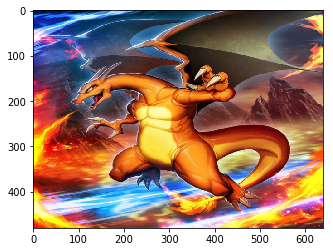

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\vcprojects\images\firedragon.jpg')
img = cv2.resize(img, (640, 480))

plt.imshow(img[:, :, [2,1,0]])

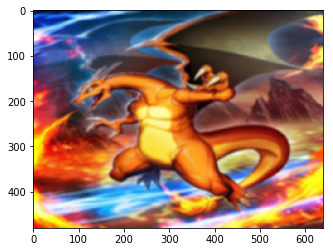

In [10]:
#Gaussian Blur Effect
g_img = cv2.GaussianBlur(img, (7, 7), 5)
plt.imshow(g_img[:, :, [2,1,0]])

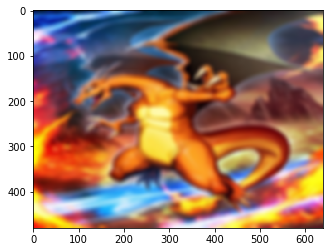

In [11]:
#图像变更模糊，因为范围更大，平均效果更明显
g_img = cv2.GaussianBlur(img, (17, 17), 5)
plt.imshow(g_img[:, :, [2,1,0]])

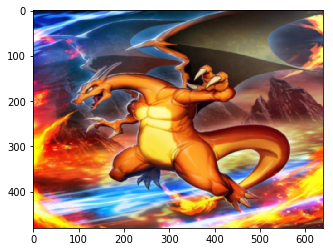

In [12]:
#利用方差更小的高斯核，图像会更尖锐
g_img = cv2.GaussianBlur(img, (7, 7), 1)
plt.imshow(g_img[:, :, [2,1,0]])

In [13]:
#查看高斯核
g_kernel = cv2.getGaussianKernel(7, 5)
g_kernel

array([[0.12895603],
       [0.14251846],
       [0.15133131],
       [0.1543884 ],
       [0.15133131],
       [0.14251846],
       [0.12895603]])

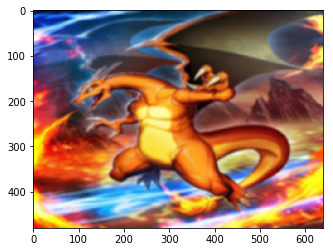

In [14]:
#一维高斯核的运算速度会更快因为每次运算会少几部运算操作
#我们来查看分布高斯核的运算效果
g1_img = cv2.GaussianBlur(img, (7, 7), 5)
g2_img = cv2.sepFilter2D(img, -1, g_kernel, g_kernel)
plt.imshow(g1_img[:, :, [2,1,0]])

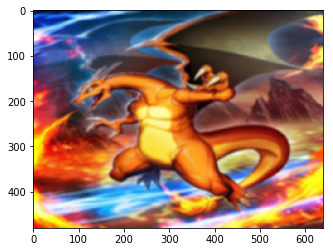

In [15]:
plt.imshow(g2_img[:, :, [2,1,0]]) #可以看出 加速核的效果和原来的高斯核效果是一样的

####### Other Applications #########
# 2nd derivative: laplacian （双边缘效果）

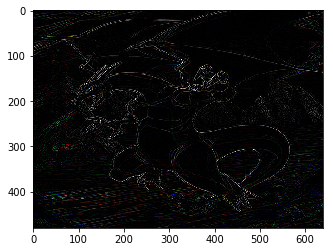

In [16]:
#二阶导数有双边缘效果
sharp_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
sharp_img = cv2.filter2D(img, -1, sharp_kernel)
plt.imshow(sharp_img[:, :, [2,1,0]])

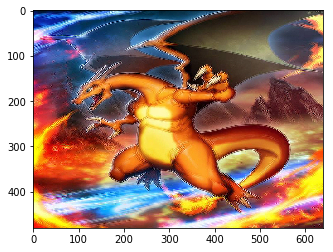

In [17]:
#图像+edge=更锐利地图像，因为突出边缘
sharp_kernel = np.array([[0, 1, 0], [1, -3, 1], [0, 1, 0]], np.float32)
sharp_img = cv2.filter2D(img, -1, sharp_kernel, sharp_kernel)
plt.imshow(sharp_img[:, :, [2,1,0]])

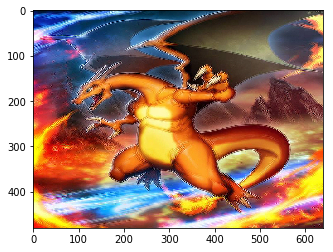

In [18]:
# 这样不对，因为，周围有4个1，中间是-3，虽然有边缘效果，但是周围得1会使得原kernel有滤波效果，使图像模糊；
# 解决：所以取kernel_lap得相反数，再加上原图像，这样突出了中心像素，效果类似于小方差的高斯，所以
#      可以既有边缘效果，又保留图像清晰度
sharp_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
lap_img = cv2.filter2D(img, -1, sharp_kernel, sharp_kernel)
plt.imshow(sharp_img[:, :, [2,1,0]])

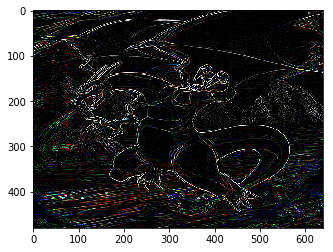

In [19]:
# 更“凶猛”的边缘效果
# 不仅考虑x-y方向上的梯度，同时考虑了对角线方向上的梯度
sharp_kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
sharp_img = cv2.filter2D(img, -1, sharp_kernel, sharp_kernel)
plt.imshow(sharp_img[:, :, [2,1,0]])

# Edge
# Sobel 算子

 x轴的sobel算子

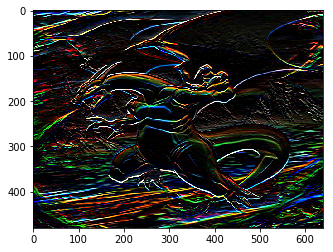

In [20]:
# x轴
sobel_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
sobel_img = cv2.filter2D(img, -1, sobel_kernel, sobel_kernel)
plt.imshow(sobel_img[:, :, [2,1,0]])

 y轴的sobel算子

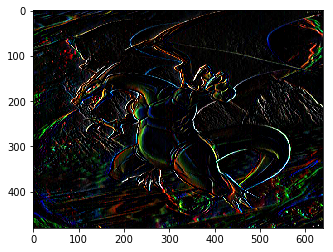

In [21]:
# y轴
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sobel_img = cv2.filter2D(img, -1, sobel_kernel, sobel_kernel)
plt.imshow(sobel_img[:, :, [2,1,0]])

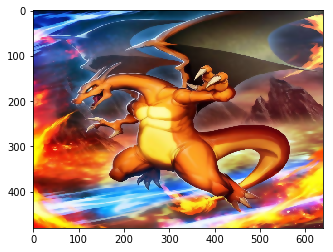

In [22]:
#双边滤波
b_img = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(b_img[:, :, [2,1,0]])

In [23]:
######### 角点 ###########
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\vcprojects\images\hex.jpg')
gray_img = np.float32(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
print(gray_img)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


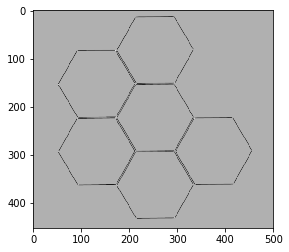

In [24]:
img_harris = cv2.cornerHarris(gray_img, 2, 3, 0.05)
plt.imshow(img_harris, cmap='gray')

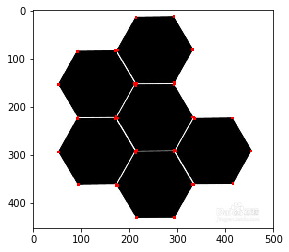

In [26]:
# 没法看原因：1. float类型； 2. img_harris本质上是每个pixel对于Harris函数的响应值
# 没有看的价值
# 为了显示清楚 使用膨胀操作
img_harris = cv2.dilate(img_harris , None)
thres = 0.005 * np.max(img_harris)
img = cv2.resize(img,(500, 453))
img[img_harris > thres] = [0, 0, 255]
plt.imshow(img[:,:,[2,1,0]])
#可以看到每个角落都有红色的标记

(2295, 128)


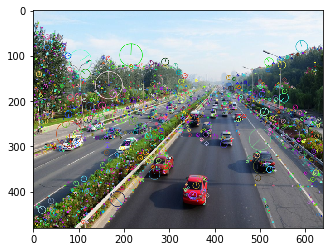

In [29]:
########### SIFT ###########
img = cv2.imread(r'D:\vcprojects\images\car.png')
img = cv2.resize(img,(640, 480))
# create sift class
sift = cv2.xfeatures2d.SIFT_create()
# detect SIFT
kp = sift.detect(img,None)
# compute SIFT descriptor
kp,des = sift.compute(img,kp)
print(des.shape)
img_sift = cv2.drawKeypoints(img,kp,outImage = np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift[:,:,[2,1,0]]) 
 